In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
 #Load datasets
data_x = pd.read_csv("logisticX.csv", header=None)
data_y = pd.read_csv("logisticY.csv", header=None)



In [4]:
#Display dataset info
print("Feature Set Shape:", data_x.shape)
print("Target Set Shape:", data_y.shape)


Feature Set Shape: (100, 2)
Target Set Shape: (100, 1)


In [5]:
# Normalize feature set
data_x = (data_x - data_x.mean()) / data_x.std()



In [6]:
#Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)



In [9]:
class LogisticRegressor:
    def __init__(self, learning_rate, epochs): # Fixed: __init__ instead of _init_
        self.alpha = learning_rate
        self.iterations = epochs
        self.weights = None
        self.bias = 0
        self.loss_history = []

    def activation(self, value):
        return 1 / (1 + np.exp(-value))

    def train(self, features, labels):
        features = np.array(features)
        labels = np.array(labels).flatten()
        samples, attributes = features.shape
        self.weights = np.zeros(attributes)
        for _ in range(self.iterations): # Fixed: Indentation corrected
            linear_output = np.dot(features, self.weights) + self.bias
            predictions = self.activation(linear_output)

            weight_gradient = (1 / samples) * np.dot(features.T, (predictions - labels))
            bias_gradient = (1 / samples) * np.sum(predictions - labels)

            self.weights -= self.alpha * weight_gradient
            self.bias -= self.alpha * bias_gradient

            loss = -(1 / samples) * np.sum(labels * np.log(predictions) + (1 - labels) * np.log(1 - predictions))
            self.loss_history.append(loss)

    def classify(self, features):
        return (self.activation(np.dot(features, self.weights) + self.bias) >= 0.5).astype(int)

In [10]:
# Train logistic regression model
model = LogisticRegressor(learning_rate=0.1, epochs=10000)
model.train(x_train, y_train)
print("Final Loss:", model.loss_history[-1])



Final Loss: 0.23715367344824523


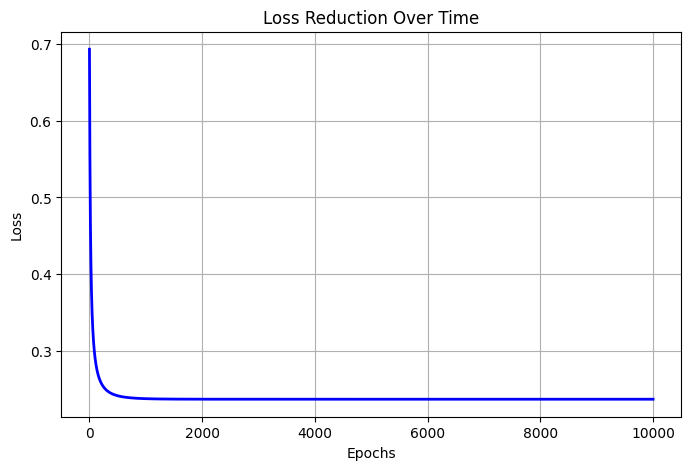

In [11]:
 #Plot loss over iterations
plt.figure(figsize=(8, 5))
plt.plot(model.loss_history, color='blue', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Reduction Over Time")
plt.grid()
plt.show()


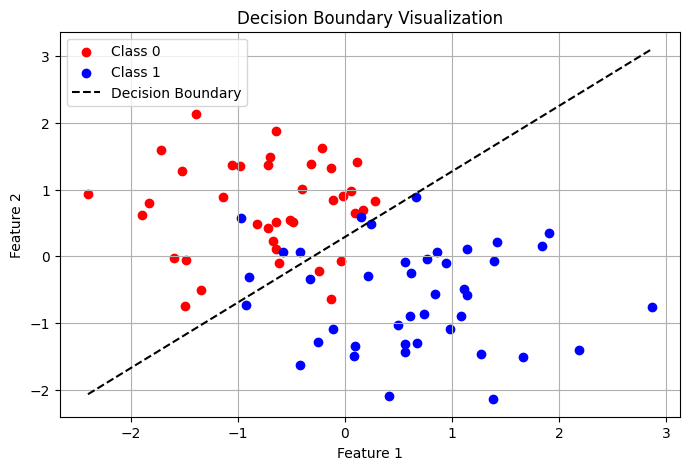

In [12]:
# Decision Boundary Visualization
plt.figure(figsize=(8, 5))
plt.scatter(x_train[0][y_train[0] == 0], x_train[1][y_train[0] == 0], color='red', label='Class 0')
plt.scatter(x_train[0][y_train[0] == 1], x_train[1][y_train[0] == 1], color='blue', label='Class 1')
x1_vals = np.linspace(data_x[0].min(), data_x[0].max(), 100)
x2_vals = (-model.weights[0] * x1_vals - model.bias) / model.weights[1]
plt.plot(x1_vals, x2_vals, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Decision Boundary Visualization")
plt.grid()
plt.show()



In [13]:
#Evaluate on test set
y_predictions = model.classify(x_test)
conf_matrix = np.zeros((2, 2), dtype=int)
for i in range(len(y_test)):
    conf_matrix[y_test.iloc[i, 0]][y_predictions[i]] += 1

accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}")

Confusion Matrix:
 [[10  2]
 [ 0  8]]
Accuracy: 0.9000, Precision: 0.8000, Recall: 1.0000, F1-score: 0.8889
